In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
# Load data
data = pd.read_excel('../data/data.xlsx')
data

,sequence,Episode 1,ID Episode 1,Runtime Episode 1,Time period Episode 1,Genres Episode 1,Rating Episode 1,Episode 2,ID Episode 2,Runtime Episode 2,...,Episode 8,ID Episode 8,Runtime Episode 8,Time period Episode 8,Genres Episode 8,Rating Episode 8,drama label,thriller label,action label,max_label
0,1806,Pink,4069937,56m,6 Months After the Heist,"{'drama': 0.41, 'thriller': 0.32, 'action': 0.27}",7.5,Red,4069936,36m,...,White,4069938,48m,The Heist,"{'drama': 0.0, 'thriller': 0.48, 'action': 0.52}",7.4,0.2078,0.5033,0.2889,thriller
1,9254,Yellow,3483983,49m,6 Weeks Before the Heist,"{'drama': 0.13, 'thriller': 0.39, 'action': 0.48}",7.0,Pink,4069937,56m,...,White,4069938,48m,The Heist,"{'drama': 0.0, 'thriller': 0.48, 'action': 0.52}",7.4,0.1773,0.4173,0.4055,thriller
2,31441,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",7.1,Yellow,3483983,49m,...,Blue,4069266,48m,5 Days Before the Heist,"{'drama': 0.38, 'thriller': 0.43, 'action': 0.19}",7.2,0.2683,0.3617,0.3700,action
3,18465,Blue,4069266,48m,5 Days Before the Heist,"{'drama': 0.56, 'thriller': 0.33, 'action': 0.11}",7.2,Red,4069936,36m,...,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",7.1,0.3157,0.4386,0.2458,thriller
4,34383,Violet,4069934,49m,24 Years Before the Heist,"{'drama': 0.71, 'thriller': 0.1, 'action': 0.19}",7.5,Red,4069936,36m,...,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",7.1,0.3888,0.2875,0.3238,drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30315,27756,Yellow,3483983,49m,6 Weeks Before the Heist,"{'drama': 0.13, 'thriller': 0.39, 'action': 0.48}",7.0,Blue,4069266,48m,...,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",7.1,0.2596,0.3677,0.3727,action
30316,30759,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",7.1,Green,3485676,46m,...,Yellow,3483983,49m,6 Weeks Before the Heist,"{'drama': 0.13, 'thriller': 0.39, 'action': 0.48}",7.0,0.3113,0.4394,0.2492,thriller
30317,823,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",7.1,Green,3485676,46m,...,Violet,4069934,49m,24 Years Before the Heist,"{'drama': 0.52, 'thriller': 0.24, 'action': 0.24}",7.5,0.3113,0.4474,0.2412,thriller
30318,36432,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",7.1,Green,3485676,46m,...,Pink,4069937,56m,6 Months After the Heist,"{'drama': 0.55, 'thriller': 0.2, 'action': 0.25}",7.5,0.4168,0.2891,0.2941,drama


In [3]:
# Drop unnesessary columns
rating_columns = [col for col in data.columns if col.startswith("Rating")]
runtime_columns = [col for col in data.columns if col.startswith("Runtime")]
id_columns = [col for col in data.columns if col.startswith("ID")]
sequence_column = ['sequence']

cols_to_drop = rating_columns + id_columns + sequence_column + runtime_columns

data = data.drop(columns=cols_to_drop, axis=1)
data.head()

,Episode 1,Time period Episode 1,Genres Episode 1,Episode 2,Time period Episode 2,Genres Episode 2,Episode 3,Time period Episode 3,Genres Episode 3,Episode 4,...,Episode 7,Time period Episode 7,Genres Episode 7,Episode 8,Time period Episode 8,Genres Episode 8,drama label,thriller label,action label,max_label
0,Pink,6 Months After the Heist,"{'drama': 0.41, 'thriller': 0.32, 'action': 0.27}",Red,The Morning After the Heist,"{'drama': 0.22, 'thriller': 0.39, 'action': 0.39}",Violet,24 Years Before the Heist,"{'drama': 0.62, 'thriller': 0.14, 'action': 0.24}",Green,...,Yellow,6 Weeks Before the Heist,"{'drama': 0.14, 'thriller': 0.36, 'action': 0.5}",White,The Heist,"{'drama': 0.0, 'thriller': 0.48, 'action': 0.52}",0.2078,0.5033,0.2889,thriller
1,Yellow,6 Weeks Before the Heist,"{'drama': 0.13, 'thriller': 0.39, 'action': 0.48}",Pink,6 Months After the Heist,"{'drama': 0.43, 'thriller': 0.33, 'action': 0.24}",Green,7 Years Before the Heist,"{'drama': 0.48, 'thriller': 0.19, 'action': 0.33}",Violet,...,Blue,5 Days Before the Heist,"{'drama': 0.37, 'thriller': 0.42, 'action': 0.21}",White,The Heist,"{'drama': 0.0, 'thriller': 0.48, 'action': 0.52}",0.1773,0.4173,0.4055,thriller
2,Orange,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",Yellow,6 Weeks Before the Heist,"{'drama': 0.14, 'thriller': 0.38, 'action': 0.48}",Green,7 Years Before the Heist,"{'drama': 0.48, 'thriller': 0.19, 'action': 0.33}",White,...,Violet,24 Years Before the Heist,"{'drama': 0.57, 'thriller': 0.22, 'action': 0.22}",Blue,5 Days Before the Heist,"{'drama': 0.38, 'thriller': 0.43, 'action': 0.19}",0.2683,0.3617,0.3700,action
3,Blue,5 Days Before the Heist,"{'drama': 0.56, 'thriller': 0.33, 'action': 0.11}",Red,The Morning After the Heist,"{'drama': 0.22, 'thriller': 0.39, 'action': 0.39}",White,The Heist,"{'drama': 0.14, 'thriller': 0.38, 'action': 0.48}",Green,...,Violet,24 Years Before the Heist,"{'drama': 0.57, 'thriller': 0.22, 'action': 0.22}",Orange,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",0.3157,0.4386,0.2458,thriller
4,Violet,24 Years Before the Heist,"{'drama': 0.71, 'thriller': 0.1, 'action': 0.19}",Red,The Morning After the Heist,"{'drama': 0.22, 'thriller': 0.39, 'action': 0.39}",Yellow,6 Weeks Before the Heist,"{'drama': 0.09, 'thriller': 0.36, 'action': 0.55}",White,...,Pink,6 Months After the Heist,"{'drama': 0.52, 'thriller': 0.19, 'action': 0.29}",Orange,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",0.3888,0.2875,0.3238,drama


# Splitting the data

In [4]:
# Split the data into 70% training, 15% validation, and 15% testing
train_size = 0.7
val_size = 0.15
test_size = 0.15

train_val_split = StratifiedShuffleSplit(n_splits=1, test_size=val_size + test_size, random_state=42)
for train_index, val_test_index in train_val_split.split(data, data['max_label']):
    training_set = data.loc[train_index]
    val_test_set = data.loc[val_test_index]

# Reset the index for strat_val_test_set before the next split
val_test_set = val_test_set.reset_index(drop=True)

# Split the 'strat_val_test_set' into validation and test sets
val_test_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size / (val_size + test_size), random_state=42)
for val_index, test_index in val_test_split.split(val_test_set, val_test_set['max_label']):
    validation_set = val_test_set.loc[val_index]
    test_set = val_test_set.loc[test_index]

In [5]:
# Verify the final splits
print(f"Training set shape: {training_set.shape}")
print(f"Validation set shape: {validation_set.shape}")
print(f"Testing set shape: {test_set.shape}")

Training set shape: (21224, 28)
Validation set shape: (4548, 28)
Testing set shape: (4548, 28)


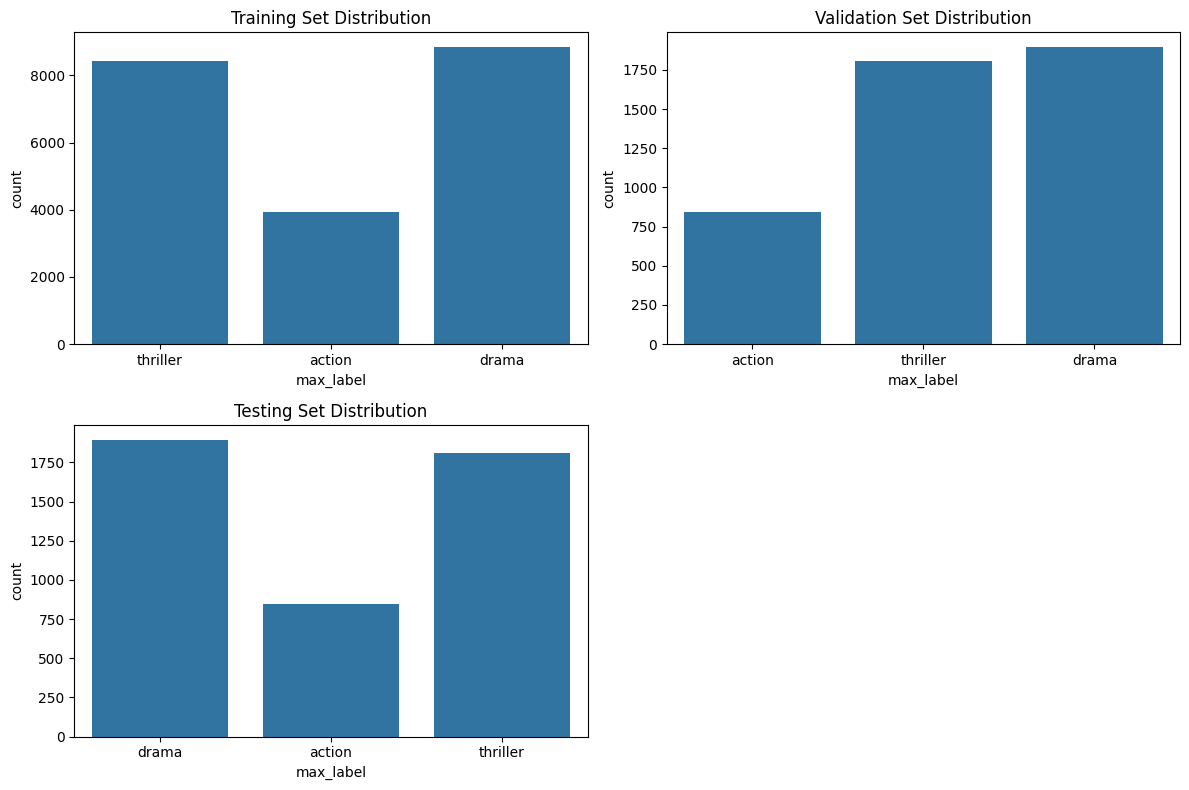

In [6]:
# Plotting the distribution of target labels in each dataset
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='max_label', data=training_set)
plt.title("Training Set Distribution")

plt.subplot(2, 2, 2)
sns.countplot(x='max_label', data=validation_set)
plt.title("Validation Set Distribution")

plt.subplot(2, 2, 3)
sns.countplot(x='max_label', data=test_set)
plt.title("Testing Set Distribution")

plt.tight_layout()
plt.show()

In [7]:
# Check overlap (should be empty)
overlap = set(training_set).intersection(set(test_set.index))
print("Overlap between train and test sets:", overlap)

Overlap between train and test sets: set()


In [8]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21224 entries, 24155 to 19423
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Episode 1              21224 non-null  object 
 1   Time period Episode 1  21224 non-null  object 
 2   Genres Episode 1       21224 non-null  object 
 3   Episode 2              21224 non-null  object 
 4   Time period Episode 2  21224 non-null  object 
 5   Genres Episode 2       21224 non-null  object 
 6   Episode 3              21224 non-null  object 
 7   Time period Episode 3  21224 non-null  object 
 8   Genres Episode 3       21224 non-null  object 
 9   Episode 4              21224 non-null  object 
 10  Time period Episode 4  21224 non-null  object 
 11  Genres Episode 4       21224 non-null  object 
 12  Episode 5              21224 non-null  object 
 13  Time period Episode 5  21224 non-null  object 
 14  Genres Episode 5       21224 non-null  object 
 15  Epi

# Define the final columns

In [9]:
training_set = training_set.drop('max_label', axis=1)
validation_set = validation_set.drop('max_label', axis=1)
test_set = test_set.drop('max_label', axis=1)

In [10]:
# Define target columns for multi-output regression

label_column = ['drama label', 'thriller label', 'action label']

X_train = training_set.drop(columns=label_column)
y_train = training_set[label_column]

X_validation = validation_set.drop(columns=label_column)
y_validation = validation_set[label_column]

X_test = test_set.drop(columns=label_column)
y_test = test_set[label_column]

# Pipeline

In [11]:
# Imports
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from transformers import GenresTransformer, TimePeriodTransformer
from sklearn.metrics import mean_squared_error, r2_score

### Preprocessing Pipeline

In [12]:
# Preprocessing pipeline:

genres_columns = [col for col in training_set.columns if col.startswith("Genres")]
episode_columns = [col for col in training_set.columns if col.startswith("Episode")]
time_period_columns = [col for col in training_set.columns if col.startswith("Time period")]

# Get column indices for genres and time periods
genres_indices = [training_set.columns.get_loc(col) for col in genres_columns]
episode_indices = [training_set.columns.get_loc(col) for col in episode_columns]
time_period_indices = [training_set.columns.get_loc(col) for col in time_period_columns]


# First ColumnTransformer for value transformations
value_transformations = ColumnTransformer(
    transformers=[
        ('genre_transformer', GenresTransformer(columns=genres_columns), genres_indices),
        ('time_period_transformer', TimePeriodTransformer(columns=time_period_columns), time_period_indices),
        ('ordinal_encoder', OrdinalEncoder(), episode_indices)
    ],
    remainder='passthrough'
)

# Second ColumnTransformer for scaling and encoding
scaling_encoding = ColumnTransformer(
    transformers=[
        ('robust_scaler', RobustScaler(), time_period_indices)
    ],
    remainder='passthrough'
)

# Combine them into a final pipeline
preprocessing_pipeline = Pipeline([
    ('value_transformations', value_transformations),
    ('scaling_encoding', scaling_encoding)
])


### Full Pipeline

In [13]:
# Define the final pipeline
final_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),  
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))        
])

In [14]:
final_pipeline.fit(X_train, y_train)

y_validation_pred = final_pipeline.predict(X_validation)
y_test_pred = final_pipeline.predict(X_test)

### Model Evaluation

In [22]:
# Predict on the train set
train_preds = final_pipeline.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds, multioutput='uniform_average')

print(f"Mean Squared Error on Training Set: {train_mse:.4f}")
print(f"R2 on Training Set: {train_r2:.4f}")

Mean Squared Error on Training Set: 0.0000
R2 on Training Set: 0.9999


In [15]:
# Validation set evaluation
val_mse = mean_squared_error(y_validation, y_validation_pred)
val_r2 = r2_score(y_validation, y_validation_pred, multioutput='uniform_average') 
print(f"Mean Squared Error on Validation Set: {val_mse:.4f}")
print(f"R2 on Validation Set: {val_r2:.4f}")


Mean Squared Error on Validation Set: 0.0000
R2 on Validation Set: 0.9990


In [16]:
# Test set evaluation
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred, multioutput='uniform_average') 
print(f"Mean Squared Error on Test Set: {test_mse:.4f}")
print(f"R2 on Test Set: {test_r2:.4f}")

Mean Squared Error on Test Set: 0.0000
R2 on Test Set: 0.9990


In [23]:
# Check for overfitting
if train_r2 > 0.9 and test_r2 < 0.8:
    print("\nWarning: Overfitting detected!")
    print("The model performs significantly better on the training set than on the testing set.")
else:
    print("\nNo significant overfitting detected.")


No significant overfitting detected.


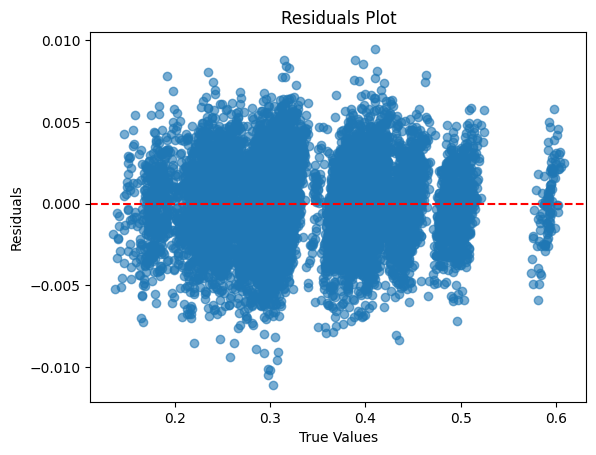

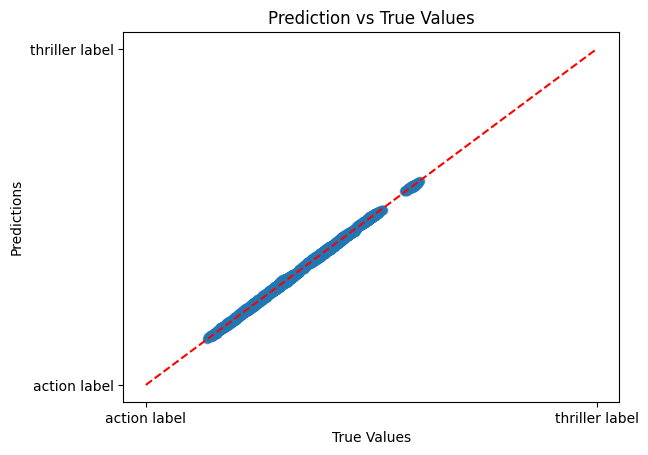

In [17]:
# Residuals plot
residuals = y_validation - y_validation_pred
plt.scatter(y_validation, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()

# Prediction vs True Values
plt.scatter(y_validation, y_validation_pred, alpha=0.6)
plt.plot([min(y_validation), max(y_validation)], [min(y_validation), max(y_validation)], 'r--')  # Line of perfect prediction
plt.title("Prediction vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

# Saving the pipeline

In [101]:
import joblib
joblib.dump(final_pipeline, 'regression_pipeline.pkl')

['regression_pipeline.pkl']